In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.pylab as plb
from scipy.interpolate import UnivariateSpline

In [2]:
x_array, theta_array, F1_array, F2_array, F0_array, phi_array, W_array = np.loadtxt("kbhsh_2.dat", unpack=1)
r_H, omega_H, M_H, J_H, M_ADM, J_ADM, M_SF, J_SF, m = np.loadtxt("kbhsh_2_parameters.dat", unpack=1)

In [3]:
def g_tt(r, theta, F0, F2, W, r_H):
    return -np.exp(2*F0)*(1-r_H/r)+np.exp(2*F2)*(r**2)*(W**2)*(np.sin(theta)**2)

def g_tphi(r, theta, F2, W):
    return -np.exp(2*F2)*(r**2)*(W)*(np.sin(theta)**2)

def g_phiphi(r, theta, F2):
    return np.exp(2*F2)*(r**2)*(np.sin(theta)**2)

def g_thetatheta(r, F1):
    return np.exp(2*F1)*(r**2)

def g_rr(r, F1, r_H):
    return np.exp(2*F1)/(1-r_H/r)

def u_t(gtt, gtphi, gphiphi, l):
    return -np.sqrt(((gtphi**2-gtt*gphiphi)/(gphiphi+2*l*gtphi+gtt*(l**2))))

def W(u_t):
    return np.log(np.absolute(u_t))

def r_mb():
    return 0

def r_ms():
    return 0

def Omega_func(gtt, gtphi, gphiphi, l):
    return -((l*gtt+gtphi)/(l*gtphi+gphiphi))

def l_func(gtt, gtphi, gphiphi, Omega):
    return -((Omega*gphiphi+gtphi)/(Omega*gtphi+gtt))

def u_t_con(u_t, Omega, l):
    return (1/u_t)*(-1/(1-Omega*l))

def l_k(gtt, gtphi, gphiphi, drgtt, drgtphi, drgphiphi):
    B = -drgtphi+np.sqrt(drgtphi**2-drgtt*drgphiphi)
    return -(B*gphiphi+drgphiphi*gtphi)/(B*gtphi+drgphiphi*gtt)

def l_b(gtt, gtphi, gphiphi):
    return (gtphi+np.sqrt((gtphi**2-gtt*gphiphi)*(1+gtt)))/(-gtt)

def K_function(W_in, W_c, gamma, rho_c):
    return ((np.exp(W_in-W_c)-1)*((gamma-1)/(gamma*(rho_c**(gamma-1)))))

def rho(W, W_in, gamma, K):
    return ((np.exp(W_in-W)-1)*((gamma-1)/(gamma*K)))**((1)/(gamma-1))

def min_finder(target_array, r_array):
    rev_target_array = np.flip(target_array)
    rev_r_array = np.flip(r_array)
    target_prev = target_array[-1]
    for i in np.arange(len(rev_target_array)):
        target_curr = rev_target_array[i]
        if target_curr > target_prev:
            target_val = target_prev
            target_r = rev_r_array[i-1]
            break
        else:
            target_prev = target_curr
    
    return (target_val, target_r)
        
        

In [37]:
x_coord_array = x_array[-249:]
theta_coord_array = np.linspace(0., np.pi/2, 30)[1:]

r_array = np.sqrt(r_H**2+((x_array)/(1-x_array))**2)

In [39]:
r_coord_array = np.sqrt(r_H**2+(x_coord_array/(1-x_coord_array))**2)
gtt_array = g_tt(r_array, theta_array , F0_array, F2_array, W_array, r_H)
gtphi_array = g_tphi(r_array, theta_array , F2_array, W_array)
gphiphi_array = g_phiphi(r_array, theta_array , F2_array)

In [41]:
M_ADM_calc = (gtt_array[-1]+1)*(r_array[-1]/2)
J_ADM_calc = -gtphi_array[-1]*(r_array[-1]/2)
print(M_ADM_calc, J_ADM_calc)

0.9289279684757159 0.7370819646780887


In [42]:
gtt_eq_array = gtt_array[-249:]
gtphi_eq_array = gtphi_array[-249:]
gphiphi_eq_array = gphiphi_array[-249:]

1.1591356578261107 0.1162396653812979


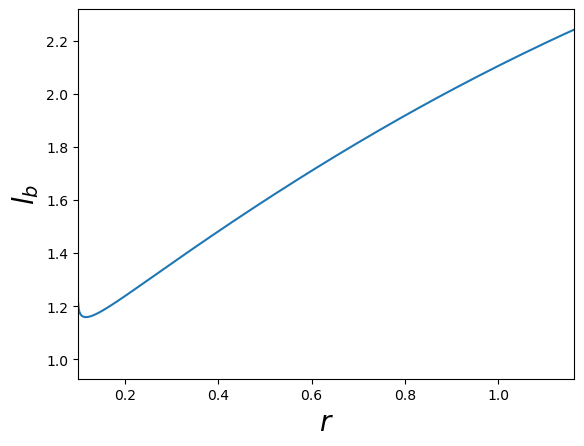

In [43]:
lb_array = l_b(gtt_eq_array, gtphi_eq_array, gphiphi_eq_array)
l_mb, r_mb = min_finder(lb_array, r_coord_array)
print(l_mb, r_mb)
        
plt.plot(r_coord_array, lb_array)
plb.xlim([r_H,10*r_mb])
plb.ylim([0.8*l_mb,2*l_mb])
lx = plt.xlabel("$r$", fontsize=20)
ly = plt.ylabel("$l_b$", fontsize=20)

1.0965076099369426 0.20995913944547978


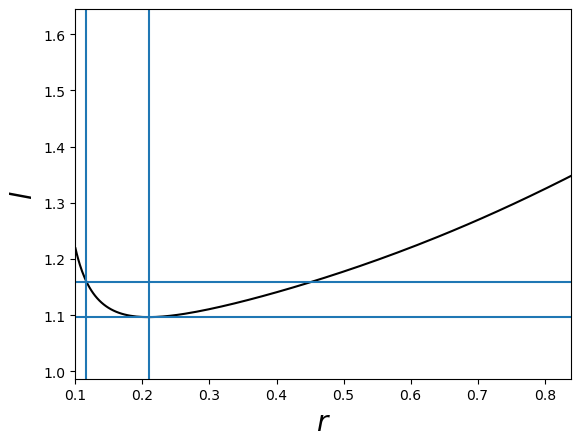

In [44]:
gtt_eq_spline = UnivariateSpline(r_coord_array, gtt_eq_array, k=3, s=0.)
gtphi_eq_spline = UnivariateSpline(r_coord_array, gtphi_eq_array, k=3, s=0.)
gphiphi_eq_spline = UnivariateSpline(r_coord_array, gphiphi_eq_array, k=3, s=0.)

drgtt = gtt_eq_spline.derivative(1)
drgtphi = gtphi_eq_spline.derivative(1)
drgphiphi = gphiphi_eq_spline.derivative(1)

drgtt_array = drgtt(r_coord_array)
drgtphi_array = drgtphi(r_coord_array)
drgphiphi_array = drgphiphi(r_coord_array)

l_k_array = l_k(gtt_eq_array, gtphi_eq_array, gphiphi_eq_array, drgtt_array, drgtphi_array, drgphiphi_array)
l_ms, r_ms = min_finder(l_k_array, r_coord_array)
print(l_ms, r_ms)

plt.plot(r_coord_array, l_k_array, c='k')
plt.axhline(l_mb)
plt.axhline(l_ms)
plt.axvline(r_ms)
plt.axvline(r_mb)
plb.xlim([r_H, 4*r_ms])
plb.ylim([0.9*l_ms, 1.5*l_ms])
lx = plt.xlabel("$r$", fontsize=20)
ly = plt.ylabel("$l$", fontsize=20)

In [53]:
l=5*M_ADM

rho_c = 1.
gamma = 4/3.
W_in = 0

In [54]:
u_t_array = u_t(gtt_array, gtphi_array, gphiphi_array, l)
pot_array = W(u_t_array)

u_t_eq_array = u_t(gtt_eq_array, gtphi_eq_array, gphiphi_eq_array, l)
pot_eq_array = W(u_t_eq_array)

/var/folders/t4/3w52rh197m5006x9z789nqg80000gn/T/ipykernel_11842/192717658.py:17: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(((gtphi**2-gtt*gphiphi)/(gphiphi+2*l*gtphi+gtt*(l**2))))


-0.022850163335511178 19.42882877980821


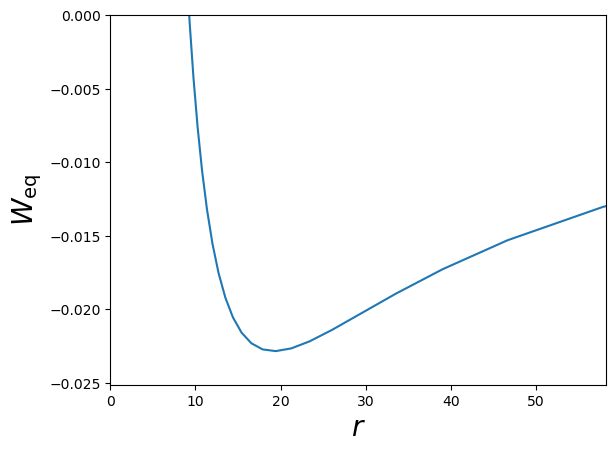

In [59]:
W_c, r_c = min_finder(pot_eq_array, r_coord_array)
print(W_c, r_c)

plt.plot(r_coord_array, pot_eq_array)
plb.xlim([0,3*r_c])
plb.ylim([1.1*W_c,0])
lx = plt.xlabel("$r$", fontsize=20)
ly = plt.ylabel("$W_{\\mathrm{eq}}$", fontsize=20)

In [56]:
    
K = K_function(W_in, W_c, gamma, rho_c)
print(W_in, W_c)

0 -0.022850163335511178


[1.37432495e+13 1.08442134e+12 8.67030681e+10 ... 9.44701615e-02
 3.59152913e-02 7.01585098e-03]


/var/folders/t4/3w52rh197m5006x9z789nqg80000gn/T/ipykernel_11842/192717658.py:48: RuntimeWarning: invalid value encountered in power
  return ((np.exp(W_in-W)-1)*((gamma-1)/(gamma*K)))**((1)/(gamma-1))


(0.0, 1.0)

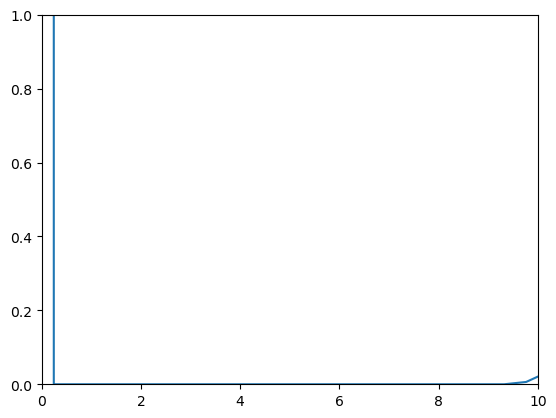

In [57]:
rho_array = rho(pot_array, W_in, gamma, K)
rho_array[np.isnan(rho_array)] = 0
print(rho_array)
rho_eq_array = rho_array[-249:]
plt.plot(r_coord_array, rho_eq_array)
plb.xlim([0,10])
plb.ylim([0,1])

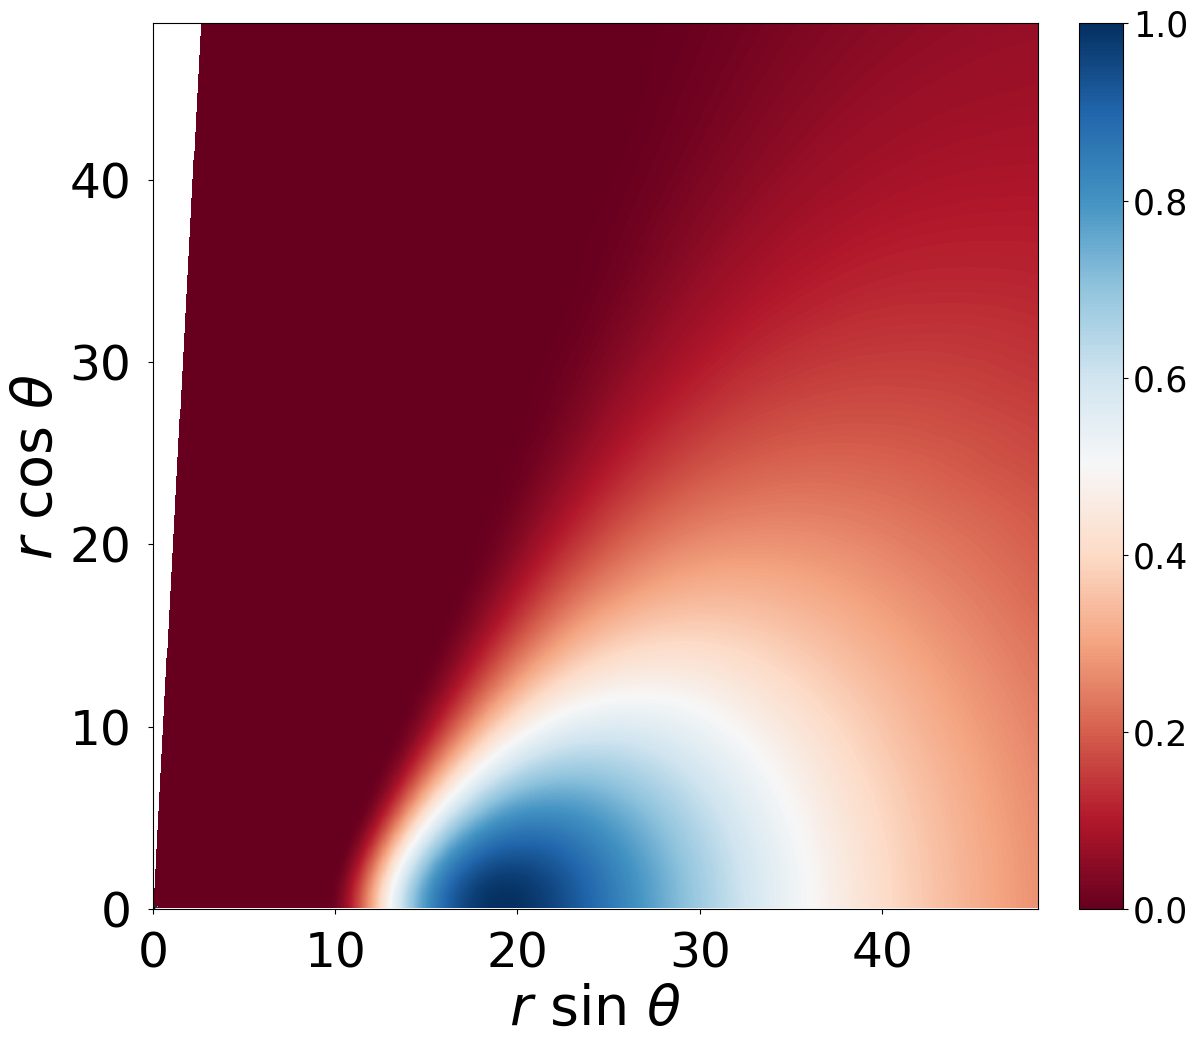

In [58]:
xArray = r_array*np.sin(theta_array)
yArray = r_array*np.cos(theta_array)

r_center = r_c
x_max = r_center * 2.5
y_max = x_max

heightArray = rho_array

numIndexes = 10000
xi = np.linspace(np.min(xArray), np.max(xArray),numIndexes)
yi = np.linspace(np.min(yArray), np.max(yArray),numIndexes)

xi, yi = np.mgrid[np.min(xArray):np.max(xArray):10000j, np.min(yArray):np.max(yArray):10000j]

DEM = griddata((xArray, yArray), heightArray, (xi, yi), method="cubic")

z_min = 0
z_max = 1

xi = np.linspace(np.min(xArray), np.max(xArray),numIndexes)
yi = np.linspace(np.min(yArray), np.max(yArray),numIndexes)

plt.figure(figsize=(13,11.5))
plt.imshow(DEM.transpose(), cmap='RdBu', vmin=0, vmax=1,
        extent=[np.min(xArray), np.max(xArray), np.min(yArray), np.max(yArray)],
        interpolation='nearest', origin='lower')
cb = plt.colorbar(fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize = 25)

plb.ylim([0,x_max])
plb.xlim([0,x_max])
plt.tick_params(labelsize=35, pad = 12)
circle = plt.Circle((0., 0.), r_H, color='black')
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle)
lx = plt.xlabel("$r$ sin $\\theta$", fontsize=40)
ly = plt.ylabel("$r$ cos $\\theta$", fontsize=40)
# plt.savefig(output_filename, dpi=900)